In [ ]:
!pip install pytube
!pip install pydub


In [4]:
from pytube import YouTube
from pydub import AudioSegment
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


In [ ]:
destination = "/content/Movies/"
# link of the video to be downloaded
# Replace with the Youtube video link you want to download.
video_link = "https://youtu.be/Wl8WpCkpSuA"

try:
    video = YouTube(video_link)
    
    audio = video.streams.filter(only_audio=True, file_extension='mp4').first()
    input=audio.download()
    wav_audio_file = "Beyond the Line.wav"

# Load the MP4 audio file
    audio = AudioSegment.from_file(input, format="mp4")

# Export the audio file as WAV format
    audio.export(wav_audio_file, format="wav")
    os.remove(input)
    
    print('Download Completed!')

except:
    print("Connection Error")  # to handle exception

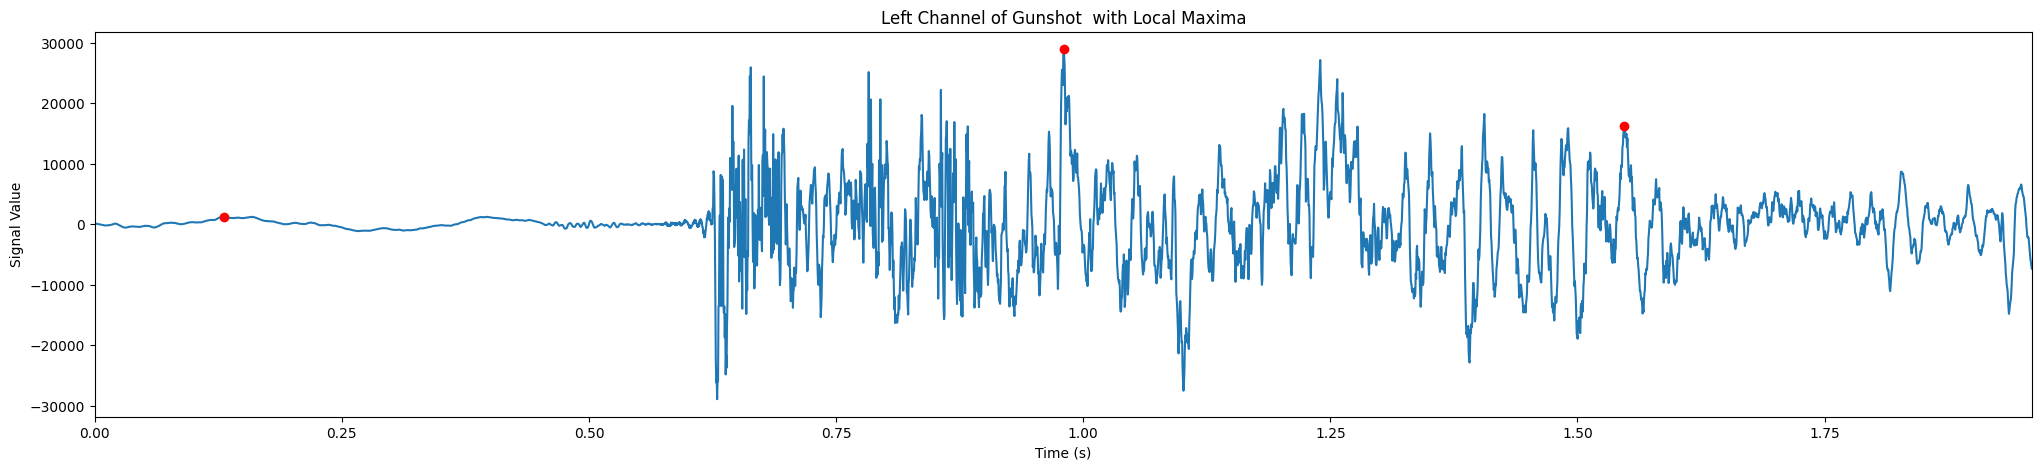

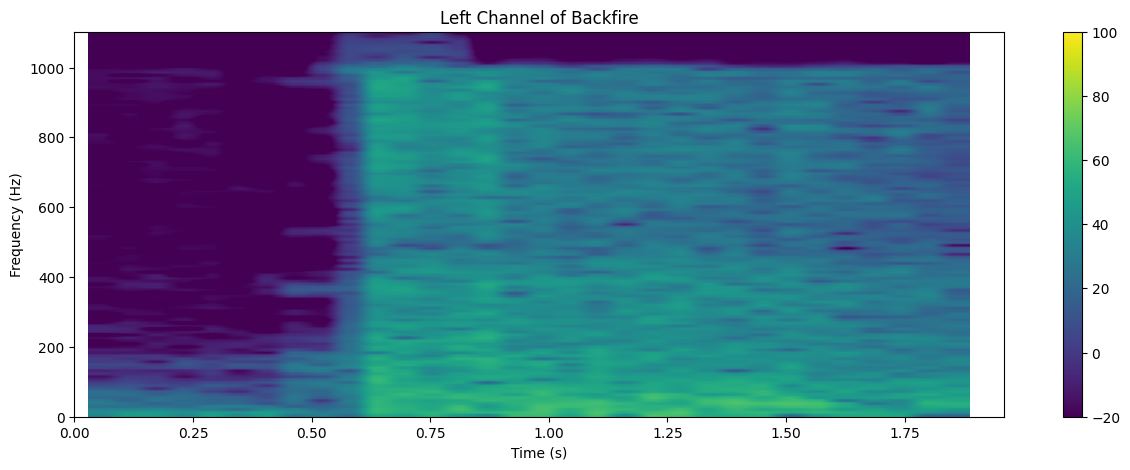

In [8]:
input_file="/content/Gunshot(1).wav"
if input_file[-3:]=='mp3':
  sound = AudioSegment.from_mp3(input_file)
  inputfile=sound.export(input_file[:-3]+"wav", format="wav")
elif input_file[-3:]=='wav':
  inputfile=input_file
wav_obj = wave.open(inputfile, 'rb')
sample_freq = wav_obj.getframerate()
n_samples = wav_obj.getnframes()
t_audio = n_samples / sample_freq
signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
l_channel = signal_array[0:]
times = np.linspace(0, n_samples / sample_freq, num=n_samples)
# Find local maxima of left channel signal
peaks, _ = find_peaks(l_channel, prominence=1000, distance=1000)
# Plot left channel signal with local maxima
plt.figure(figsize=(25, 5))
plt.plot(times, l_channel)
plt.plot(times[peaks], l_channel[peaks], 'ro')
plt.title('Left Channel of Gunshot  with Local Maxima')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
#plt.savefig('Gunshot.png')
plt.show()
plt.figure(figsize=(15, 5))
spectrum,freqs,t,im =plt.specgram(l_channel,Fs=sample_freq,vmin=-20,vmax=100)
    #spectrum - 2D array, freqs= 1D array of freq, bins = 1D array of time
    #and im= image created by imshow function
plt.title('Left Channel of Gunshot')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()
# Print times of local maxima
peak_times = times[peaks]
peak_areas = []
for i in range(len(peaks) - 1):
    start_idx = peaks[i]
    end_idx = peaks[i + 1]
    peak_area = np.trapz(l_channel[start_idx:end_idx], x=times[start_idx:end_idx])
    peak_areas.append(abs(peak_area))
z=[(i,j) for i, j in zip(times[peaks], l_channel[peaks] )]
#print('Peaks:', peaks)
#print('Peak Times:', peak_times)
#print("Area between the peaks:",peak_areas)
#print("Sum of areas between the desired peaks is",peak_areas[1])
#print(z) 



In [ ]:

audio = AudioSegment.from_file(input_file)
duration=len(audio)
index=0
for i in z:
  a=i[0]
  b=i[1]
  if b>3460:
    sound = AudioSegment.from_wav(input_file)
    StrtTime=a*1000-49
    if StrtTime <0:
      StrtTime=0
    else:
      StrtTime=StrtTime
    EndTime=a*1000+49
    if EndTime>duration:
      EndTime=duration
    else:
      EndTime=EndTime
    extract = sound[StrtTime:EndTime]
    StrtTime=round(StrtTime,2)
    EndTime=round(EndTime,2)
    time_str = f'Start time: {StrtTime}\nEnd time: {EndTime}\n'
    with open('time_file.txt', 'a') as file:
        file.write(time_str)
    extract.export(input_file[9:-4]+"("+str(index)+")"+".wav", format="wav")
    index+=1 
      

In [ ]:
import scipy
import os
from scipy.io import wavfile
from scipy.io.wavfile import read
import librosa, numpy as np
path1="C:\\Users\\samin\\Gunshots\\"
items=os.listdir(path1)
for i in items:
    audio = AudioSegment.from_file(path1+i, format="wav")
    
    slow_audio = audio._spawn(audio.raw_data, overrides={"frame_rate": int(audio.frame_rate * 0.05)})
    slow_audio.export(path1+i, format="wav")